In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import seaborn as sns 

In [9]:
df=pd.read_csv('BathSoapHousehold.csv')
df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,3,3,10,2,3,5,4,4,1,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,3,3,17,2,4,4,9,4,1,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,2,1,4,2,4,5,2,4,2,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [10]:
missingvalue=df.isnull().sum()
print (missingvalue)


Member id                0
SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6                0
P

In [11]:
#df.head(20)
df.fillna(df.mean(),inplace=True)

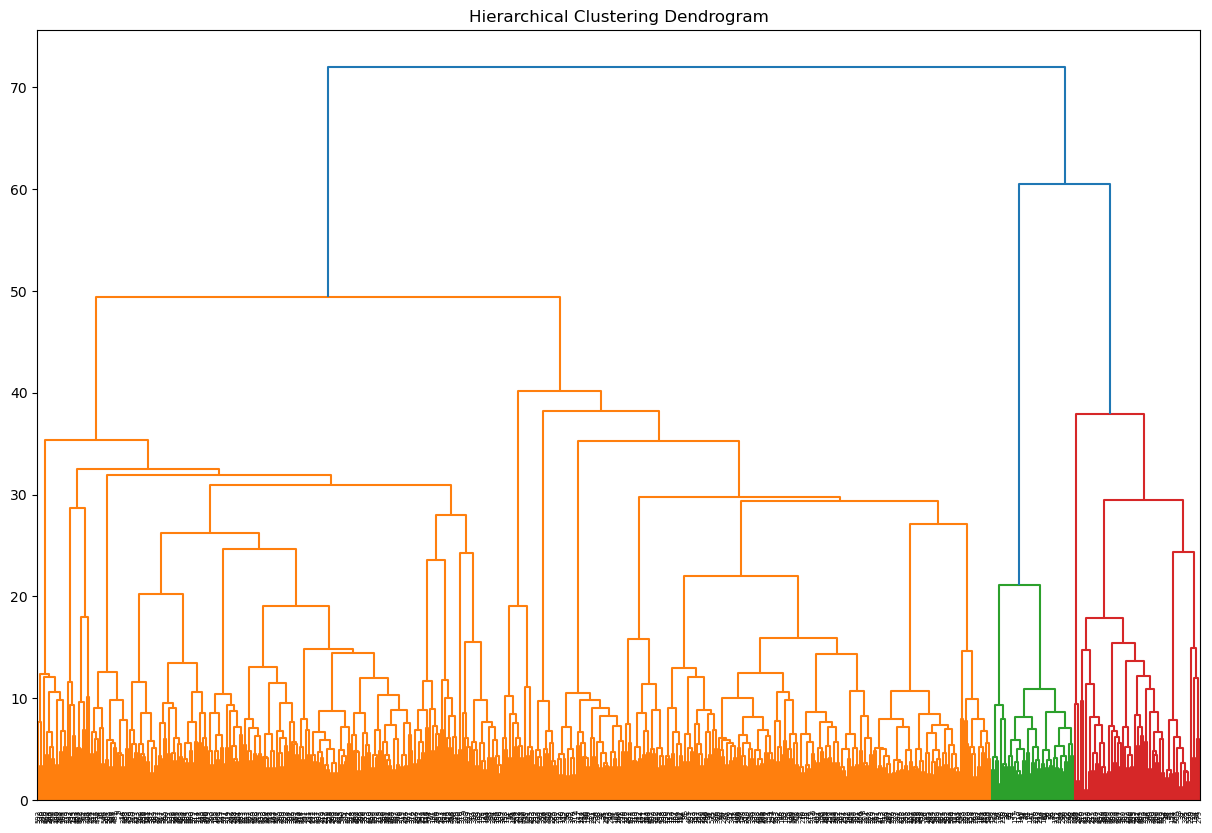

In [12]:
scaler=StandardScaler()
scaleddata=scaler.fit_transform(df.drop('Member id', axis=1))
linked=linkage(scaleddata,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

We choose the longest vertical distance which is the blue line on the left. Then we draw a horizantal line across the blue line so it will intersect 2 vertical lines, suggesting 2 clusters as the optimal number.

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


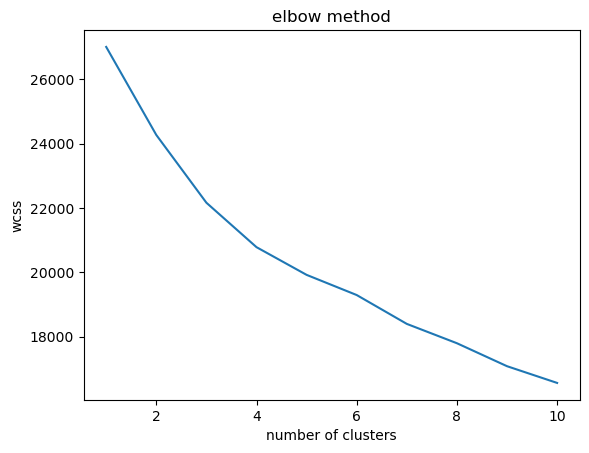

In [13]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaleddata)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

The elbow method did not give a clear indication which cluster number is the optimal number since there is no elbow in the diagram.

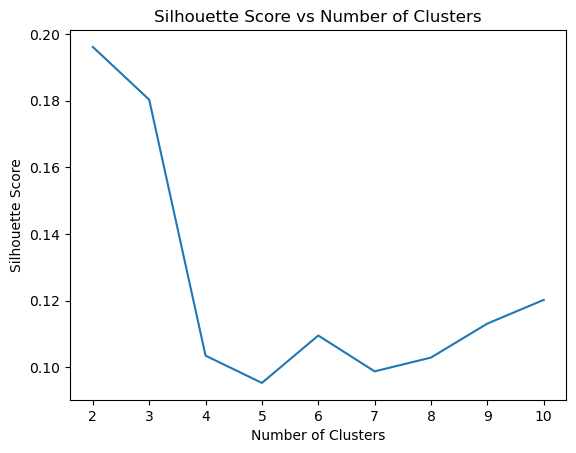

In [14]:
silscore=[]
for ncluster in range (2,11):
    kmeans=KMeans(n_clusters=ncluster).fit(scaleddata)
    silaverage=silhouette_score(scaleddata,kmeans.labels_)
    silscore.append(silaverage)
plt.plot(range (2,11),silscore)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

For the silluoette method when we have cluster number 2 we have the highest y value that indicates that we should use 2 as the optimal cluster number.

In [15]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters=kmeans.fit_predict(scaleddata)
df['cluster']=clusters
df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,cluster
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,1
1,1010020,3,2,10,2,2,4,4,2,1,...,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,1
2,1014020,2,3,10,2,4,5,6,4,1,...,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,1
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000,1
596,1167230,3,3,10,2,3,5,4,4,1,...,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505,1
597,1167340,3,3,17,2,4,4,9,4,1,...,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000,1
598,1167350,2,1,4,2,4,5,2,4,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000,1


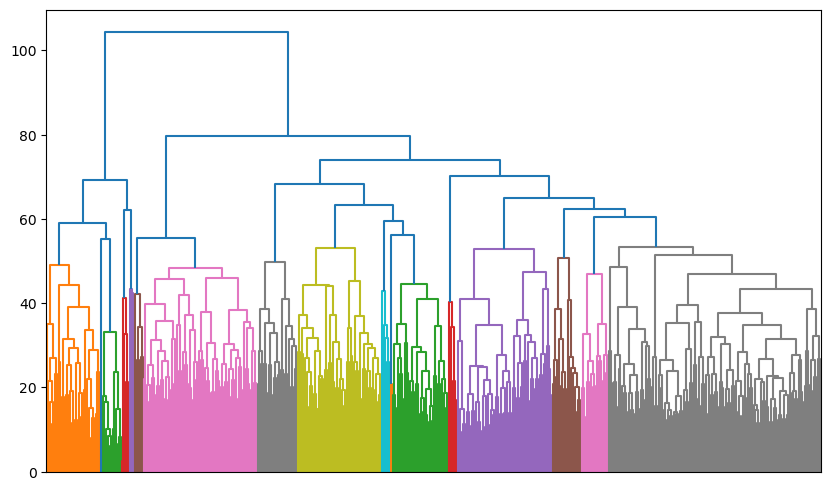

In [16]:
#plt.figure(figsize=(15,7))
Z = linkage(scaleddata, method='complete', metric='cityblock')
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, color_threshold=55)
plt.show()
#plt.title('Dendrogram')
#plt.ylabel('Manhattan Distance')
#plt.show()

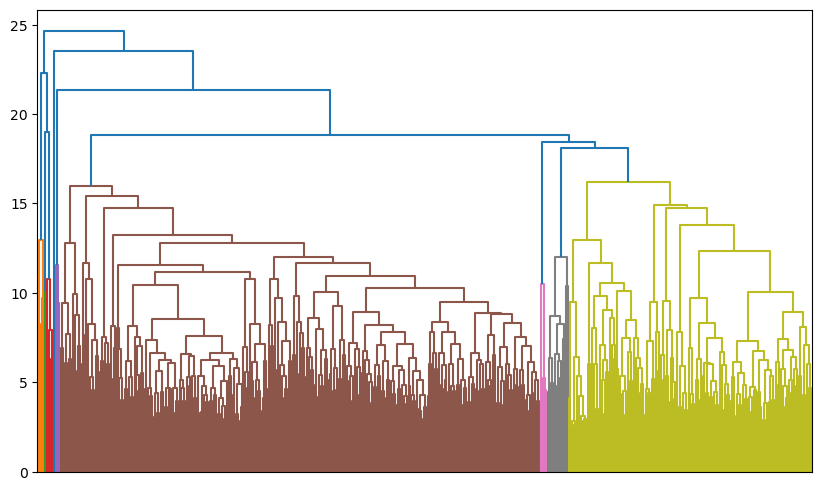

In [17]:
Z = linkage(scaleddata, method='complete')
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True)
plt.show()

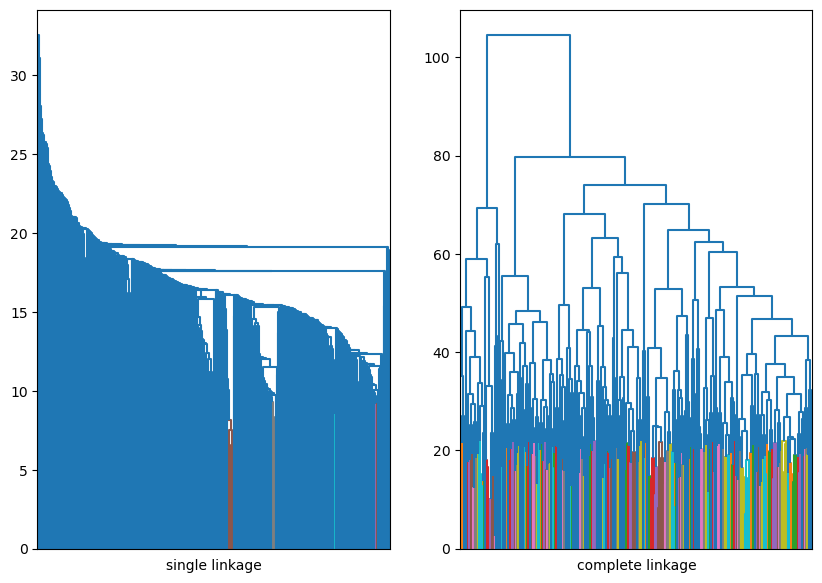

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), squeeze=False)
for i, (method, threshold) in enumerate([('single', 9.3), ('complete', 22)]):
    ax = axes[0, i]
    Z = linkage(scaleddata, method=method, metric='cityblock')
    dendrogram(Z, color_threshold=threshold, ax=ax, no_labels=True)
    ax.set_xlabel(method + ' linkage')

In [19]:
from pathlib import Path

import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt

import dmba

%matplotlib inline

In [20]:
type(scaleddata)

numpy.ndarray

In [21]:
scaleddata=pd.DataFrame(scaleddata)
#pandas.core.frame.DataFrame

In [22]:
memb = fcluster(linkage(scaleddata, method='single', metric='cityblock'), 2, criterion='maxclust')
centroids = {}
for key, item in scaleddata.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose()

Cluster 1: size 599
Cluster 2: size 1


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
1,-0.000747,0.003015,0.003182,0.004479,0.002342,0.003085,0.003045,-0.002425,0.003068,0.002492,...,0.000927,-0.00107,0.000878,0.000819,-0.006824,0.000498,-0.020772,-0.001508,0.000857,0.000484
2,0.447214,-1.806261,-1.905900,-2.682741,-1.403075,-1.847808,-1.823913,1.452736,-1.837792,-1.492908,...,-0.555525,0.64067,-0.525782,-0.490823,4.087652,-0.298493,12.442351,0.903582,-0.513426,-0.290201


In [23]:
memb = fcluster(linkage(scaleddata, method='single', metric='cityblock'), 4, criterion='maxclust')
centroids = {}
for key, item in scaleddata.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose()

Cluster 1: size 597
Cluster 2: size 1
Cluster 3: size 1
Cluster 4: size 1


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
1,0.003746,0.003168,0.001380,0.003141,0.001240,-0.000666,-0.000310,0.002342,0.002627,-0.004399,...,0.002096,-0.000407,-0.003339,0.001346,-0.005961,-0.008061,-0.022566,-0.001112,0.002315,0.001229
2,-1.341641,0.839199,2.055825,0.403826,-0.246695,2.265203,-0.083400,-1.014175,0.134793,2.454264,...,-0.555525,-0.495454,2.395518,-0.490823,-0.264365,5.180607,-0.236478,-0.261486,-0.513426,-0.290201
3,-1.341641,-0.924441,-0.973730,0.403826,0.909686,-0.019803,2.092242,-1.836478,0.134793,1.664829,...,-0.140342,0.097603,0.123669,0.178358,-0.264365,-0.069800,1.265963,0.021626,-0.355427,-0.153088
4,0.447214,-1.806261,-1.905900,-2.682741,-1.403075,-1.847808,-1.823913,1.452736,-1.837792,-1.492908,...,-0.555525,0.640670,-0.525782,-0.490823,4.087652,-0.298493,12.442351,0.903582,-0.513426,-0.290201


In [24]:
Not Useful Cluster Size above

SyntaxError: invalid syntax (3405845244.py, line 1)

In [ ]:
memb = fcluster(linkage(scaleddata, method='complete', metric='cityblock'), 2, criterion='maxclust')
centroids = {}
for key, item in scaleddata.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose()

In [ ]:
memb = fcluster(linkage(scaleddata, method='complete', metric='cityblock'), 4, criterion='maxclust')
centroids = {}
for key, item in scaleddata.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose()

In [ ]:
pd.DataFrame(centroids).plot()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), squeeze=False)
for i, (method, threshold) in enumerate([('single', 3.6), ('complete', 7)]):
    ax = axes[0, i]
    Z = linkage(scaleddata, method=method, metric='euclidean')
    dendrogram(Z, color_threshold=threshold, ax=ax, no_labels=True)
    ax.set_xlabel(method + ' linkage')

In [ ]:
threshold = 19
Z = linkage(scaleddata, method='complete', metric='cityblock')
dendrogram(Z, color_threshold=threshold, no_labels=True)
ax.set_xlabel(method + ' linkage')
plt.show()

In [ ]:
clusterprofiles=scaleddata.groupby('cluster').mean()
print(clusterprofiles)

In [ ]:
centroids = {}
for key, item in scaleddata.groupby(memb):
    centroids['Cluster {}'.format(key)] = item.mean()

In [ ]:
pd.DataFrame(centroids).round(2)

Questions to Mentor:
Even with all this data/analysis and graphs I am having trouble grasping the meaning in all of it. I'm confused in what it all means.

### TA Feedback (New):
### Cluster analysis is a data analysis technique used to group similar data points together in order to discover patterns, relateionshipts, or structures within a dataset. 
### The method of hierarchical clustering creates a representation of clusters called a dendrogram which looks like a tree. This method treats each data point as a separate cluster and then successively merges or divides them so as to achieve a desired number of clusters.
### On the other hand, the K-Means clustering method starts with a randomly selected k initial cluster centers and assigns each data point to the nearest center. Then, it refines the cluster centers to achieve desired clusters. 
### To interpret the results of clustering methods, using k-means, decide on the appropriate number of clusters by using techniques like the elbow method or silhouette score. For hierarchical clustering, select a cutoff point on the dendrogram based on your data and research goals.
### Once you have the clusters, assign each data point to one of the clusters. For k-means, this is straightforward and is based on the selected k value. For hierarchical clustering, use the cutoff point to determine cluster membership.
### Analyze the characteristics of each cluster to understand what makes them distinct. This may involve looking at the central tendencies, variability, or specific features of the data within each cluster.
### Based on all this information, you can conclude about the clusters obtained above so as to gain more information about the customers who are highly loyal and who have low loyalty values.
### Hope this makes some sense now. 

### Please check if you have performed all the analysis and conclude your results. Additionally, for part 3 submission, please submit your results in a separate report along with the Jupyter Notebook as supporting document.

TA Comment: You are on the right track for this part of the project however, some improvements are needed in the analysis. You did not include how would you choose the optimal number of clusters after exploring number of clusters. Additionally, you missed including k-means clustering on purchase behavior and basis of purchase.

You need to begin the analysis with data exploration. Later, follow the steps shown below in your analysis-

1. Do hierarchical clustering to explore the number of clusters.
2. Discuss the optimal number of clusters.
3. Perform k-means clustering on purchase behavior and basis of purchase.
4. Perform Hierarchical and k-means clustering on all variables.


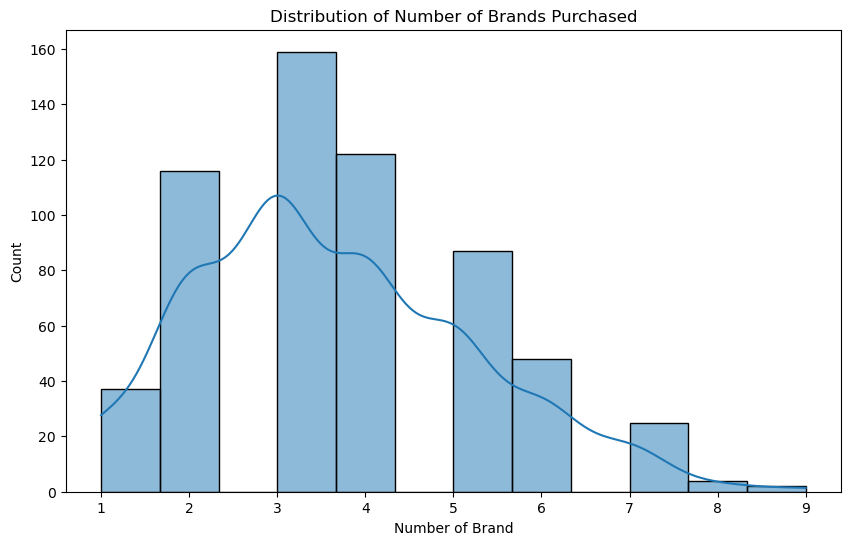

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['No. of Brands'], kde=True)
plt.title('Distribution of Number of Brands Purchased')
plt.xlabel('Number of Brand')
plt.ylabel('Count')
plt.show()

The majority of customers purchased 3-4 brands. They are moderately loyal compared to the 1-2 brand’s extreme loyalty group. 5-9 is not loyal.

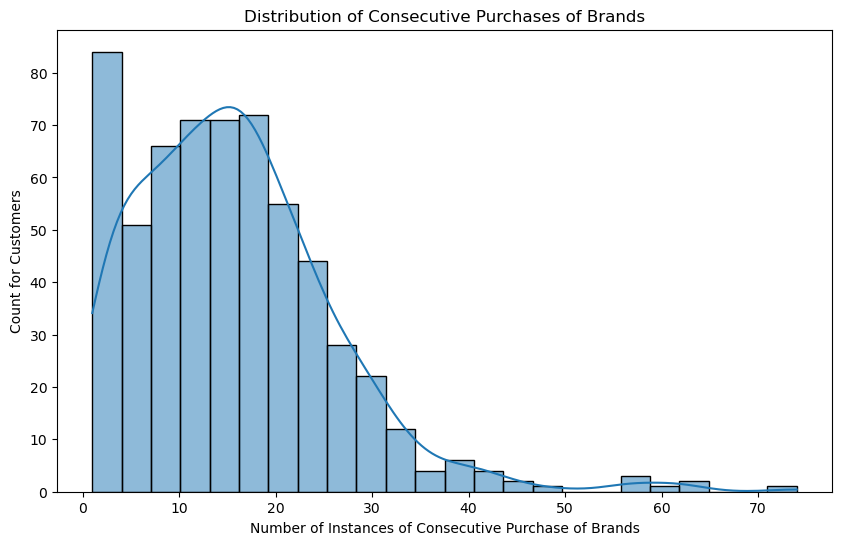

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['Brand Runs'], kde=True)
plt.title('Distribution of Consecutive Purchases of Brands')
plt.xlabel('Number of Instances of Consecutive Purchase of Brands')
plt.ylabel('Count for Customers')
plt.show()

The right side shows more loyalty.
0-10 group switches brands pretty often. They are disloyal.
10-30 group made more consecutive purchases, thus switching brands less often and being more loyal. 
30+ are loyal customers that keep buying the same brand again and again consecutively.



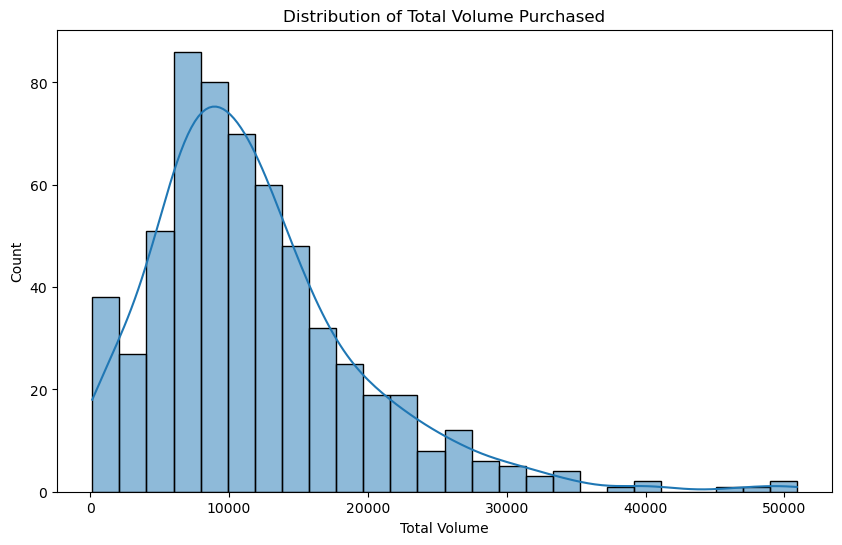

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total Volume'], kde=True)
plt.title('Distribution of Total Volume Purchased')
plt.xlabel('Total Volume')
plt.ylabel('Count')
plt.show()

Higher volume is more loyal compared to low volume. 

In [12]:
print (df.columns.tolist())

['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5', 'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14', 'PropCat 15']


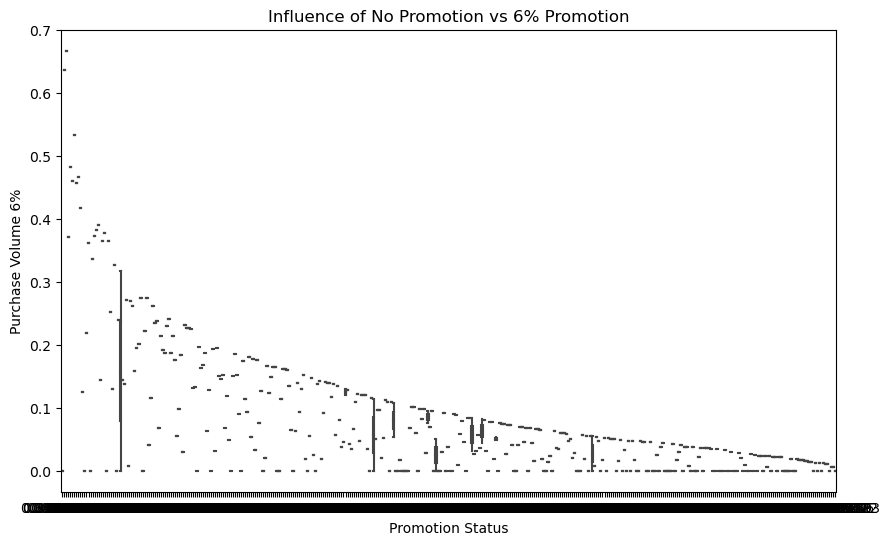

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Pur Vol Promo 6 %' , x='Pur Vol No Promo - %')
plt.title('Influence of No Promotion vs 6% Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Purchase Volume 6%')
plt.show()

A significant number of data points clustered around lower purchase volumes. Especially for customers in the no promotion category. This might suggest a sizable portion of customers tend to make smaller purchases regardless whether there is a promotion or not. 

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


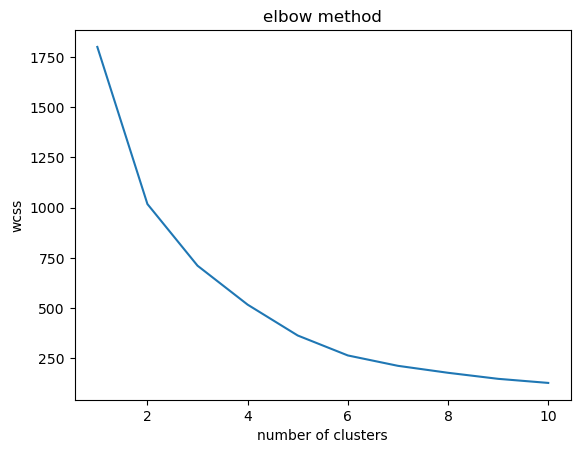

In [18]:
PurchaseBehavior1='Pur Vol No Promo - %'
PurchaseBehavior2='Pur Vol Promo 6 %'
BasisofPurchase='Pur Vol Other Promo %'
Columnofinterest=[PurchaseBehavior1,PurchaseBehavior2,BasisofPurchase]#,'No. of Brands', 'Total Volume', 'Value', 'Avg. Price' ]
columns=df.columns.drop('Member id')
scaleddf=pd.DataFrame(scaleddata,columns=columns)
subdata=scaleddf[Columnofinterest]
wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(subdata)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

2 is the optimal cluster that we should use.

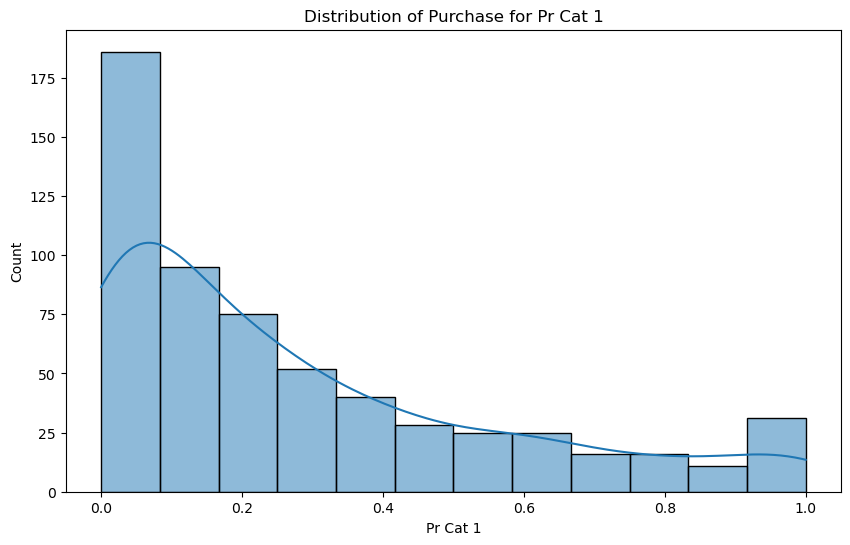

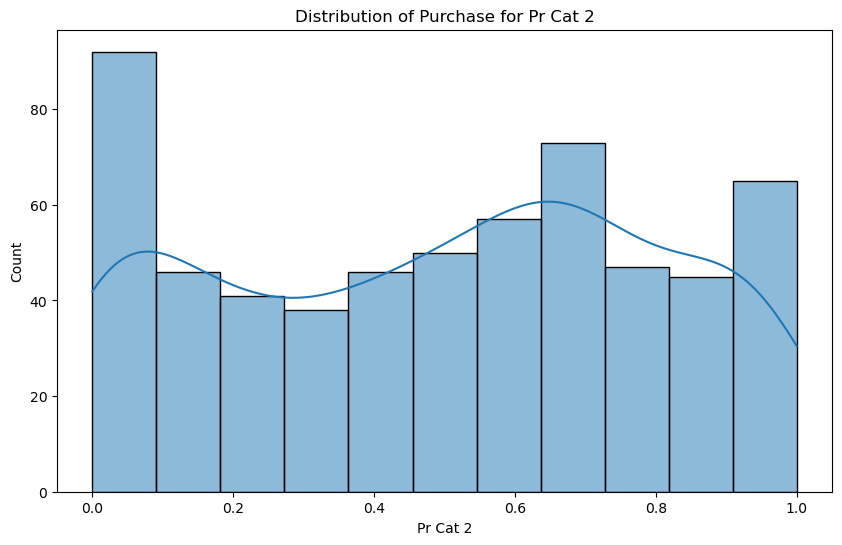

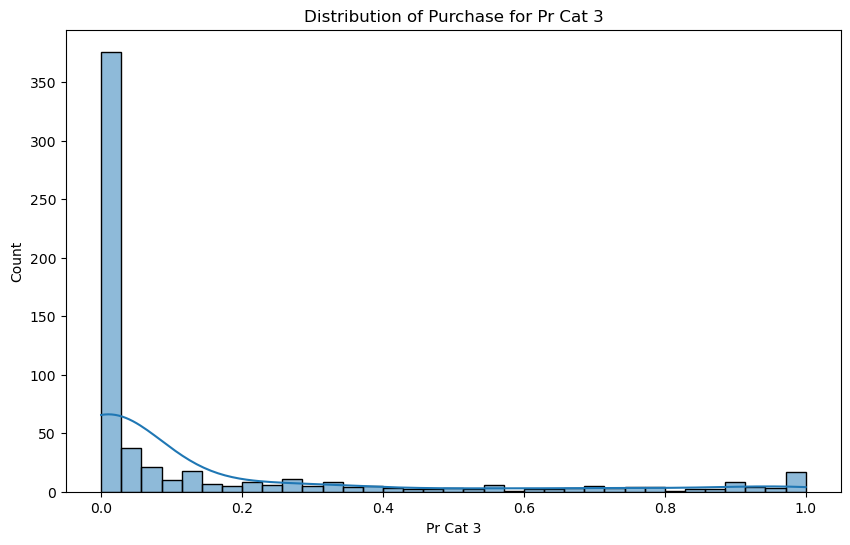

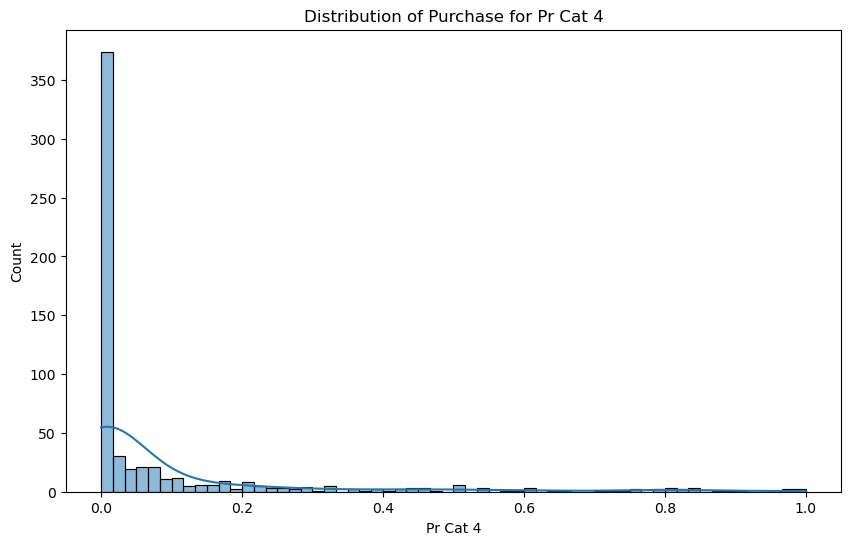

In [22]:
pricecategory=['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4']
for category in pricecategory:
    plt.figure(figsize=(10,6))
    sns.histplot(df[category], kde=True)
    plt.title(f'Distribution of Purchase for {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.show()

Cat 1
The majority of customers buying in the low-price range in this category. As price goes up we see the number of customers decrease, the only outlier is the last one (1.0) because more customers are buying in that particular price point, representing high loyalty for those customers. 

Cat 2
This is difficult to interpret as the number of customers goes down and up in a fluctuated way. There is no clear indication without knowing what the category represents. 

Cat 3
For this particular category, the majority of customers purchase on the lower range of the graph. This represents high customer loyalty as the price goes up in that category the number of customer count decreases dramatically which indicates low customer loyalty.

Cat 4
For this particular category, the majority of customers purchase on the lower range of the graph. This represents high customer loyalty as the price goes up in that category the number of customer count decreases dramatically which indicates low customer loyalty.